In [1]:
import pandas as pd
df = pd.read_csv('data/Social_Network_Ads.csv')

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


c:\Users\tusha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

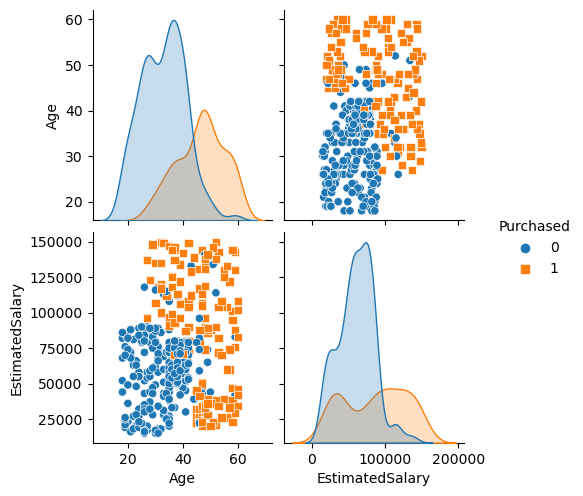

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.pairplot(df.drop("User ID", axis=1),hue = "Purchased", markers=["o","s"])
plt.show()

In [4]:
#create feature and target arrays
X = df.drop(['User ID', 'Purchased','Gender'], axis='columns')  #independent variable
#y=irisData.variety
Y = df.drop(['User ID','Gender','Age','EstimatedSalary'],axis='columns')    #dependent variable

In [5]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [7]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=15)

In [8]:
X_train.shape

(320, 2)

In [9]:
y_train.shape

(320, 1)

In [10]:
X_test.shape

(80, 2)

In [11]:
y_test.shape

(80, 1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
#instantiate learning model (k=3)
classifier = KNeighborsClassifier(n_neighbors=3)

#fitting the model
classifier.fit(X_train,y_train)

#predicting the test set results
y_pred = classifier.predict(X_test)


c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
classifier.score(X_test,y_test)*100

85.0

In [14]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[43,  2],
       [10, 25]], dtype=int64)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
#instantiate learning model (k=3)
classifier = KNeighborsClassifier(n_neighbors=2)

#fitting the model
classifier.fit(X_train,y_train)

#predicting the test set results
y_pred = classifier.predict(X_test)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
classifier.score(X_test,y_test)*100

76.25

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[43,  2],
       [17, 18]], dtype=int64)